In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [2]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\Trackmate analysis new 07052024\csv files\reformatted"
os.chdir(folder)
fname = "SPT_results_AIO_concat-Dcp1a_HOPS_condensates-BH.csv"
df_AIO = pd.read_csv(fname)

# Displacement threshold for immobile molecules
immobile_stepsize_threshold_nm = 30
# alpha component threshold for constrained diffusion
# threshold_alpha = 0.7

### alpha per track distribution

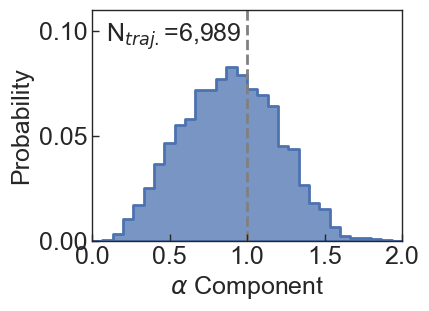

In [3]:
plt.figure(figsize=(4, 3))
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["loglog_fit_R2"] > 0.6]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    bins=30,
    stat="probability",
    common_norm=False,
    binrange=(0, 2),
    lw=2,
    element="step",
    legend=False,
)
plt.axvline(1, ls="--", c="gray", lw=2)
plt.text(
    0.09,
    0.095,
    r"N$_{traj.}$=" + f"{data.shape[0]:,}",
    fontdict={"fontsize": 18},
)
plt.xlim(0, 2)
plt.ylim(0, 0.11)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

### Angle distribution

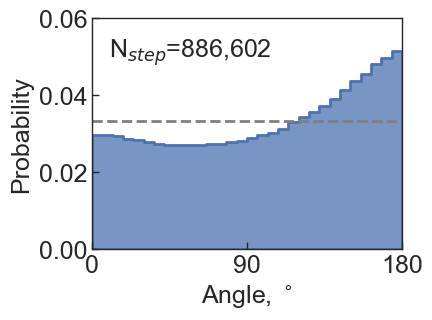

In [4]:
lst_angle = []
# lst_label = []
for _, row in df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    # labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    # lst_label.extend(labels)

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        # "label": lst_label,
    },
    dtype=object,
)


plt.figure(figsize=(4, 3))
bins = 30
sns.histplot(
    data=data,
    x="angle",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    legend=False,
)
plt.axhline(1 / 30, ls="--", c="gray", lw=2)
plt.text(
    10,
    0.05,
    r"N$_{step}$=" + f"{data.shape[0]:,}",
    fontdict={"fontsize":18},
)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.06)
plt.yticks([0, 0.02, 0.04, 0.06])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("angle_histo.png", format="png", bbox_inches="tight", dpi=300)

# Three condition angle distribution together
## Nocodazole treatment

In [5]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tkinter import filedialog

sns.set(color_codes=True, style="white")

In [6]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [7]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    combined_df = pd.concat(dfs)
    return combined_df 

In [8]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, '- Noco')
df_condition2 = load_and_label_files(csv_files_2, '+ Noco, 30 mins')
df_condition3 = load_and_label_files(csv_files_3, '+ Noco, 60 mins')

In [9]:
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [10]:
immobile_stepsize_threshold_nm = 30

lst_angle = []
lst_condition = []

for _, row in df_combined[df_combined["mean_stepsize_nm"] > immobile_stepsize_threshold_nm].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    lst_angle.extend(angles)
    lst_condition.extend([row["Condition"]] * len(angles))

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "Condition": lst_condition,
    },
    dtype=object,
)

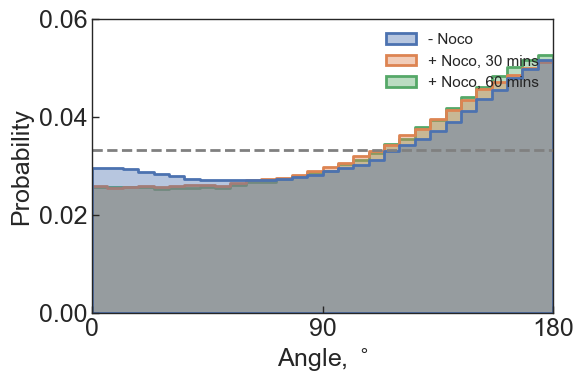

In [11]:
plt.figure(figsize=(6, 4))
bins = 30
ax = sns.histplot(
    data=data,
    x="angle",
    hue="Condition",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
)

# Customize and annotate the plot
plt.axhline(1 / bins, ls="--", c="gray", lw=2)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.06)
plt.yticks([0, 0.02, 0.04, 0.06])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

# Customize the legend
legend = ax.get_legend()
if legend is not None:
    legend.set_title(None)
    legend_frame = legend.get_frame()
    legend_frame.set_visible(False)


# Final layout adjustments and saving
plt.tight_layout()
plt.savefig("angle_histo.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

In [19]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tkinter import filedialog

sns.set(color_codes=True, style="white")

In [20]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [21]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    combined_df = pd.concat(dfs)
    return combined_df 

In [22]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, '- LatA')
df_condition2 = load_and_label_files(csv_files_2, '+ LatA, 30 mins')
df_condition3 = load_and_label_files(csv_files_3, '+ LatA, 60 mins')

In [23]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [24]:
immobile_stepsize_threshold_nm = 30

lst_angle = []
lst_condition = []

for _, row in df_combined[df_combined["mean_stepsize_nm"] > immobile_stepsize_threshold_nm].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    lst_angle.extend(angles)
    lst_condition.extend([row["Condition"]] * len(angles))

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "Condition": lst_condition,
    },
    dtype=object,
)

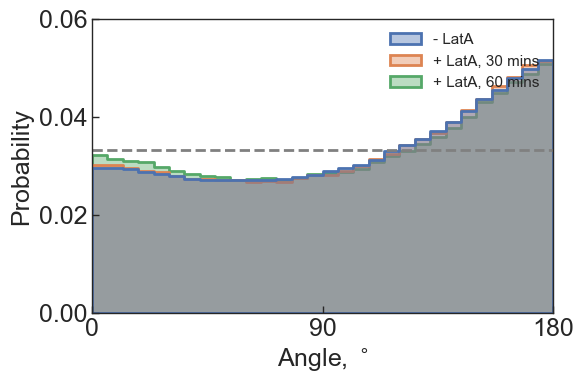

In [25]:
plt.figure(figsize=(6, 4))
bins = 30
ax = sns.histplot(
    data=data,
    x="angle",
    hue="Condition",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
)

# Customize and annotate the plot
plt.axhline(1 / bins, ls="--", c="gray", lw=2)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.06)
plt.yticks([0, 0.02, 0.04, 0.06])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

# Customize the legend
legend = ax.get_legend()
if legend is not None:
    legend.set_title(None)
    legend_frame = legend.get_frame()
    legend_frame.set_visible(False)


# Final layout adjustments and saving
plt.tight_layout()
plt.savefig("angle_histo.png", format="png", bbox_inches="tight", dpi=300)
plt.show()